In [1]:
# MUST be executed first, as sometimes causes the kernel to die and makes it inconvinient, since everything will need to be rerun
#to create sas_models simulation with GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
import pyopencl as cl
import torch
cl.create_some_context()


<pyopencl.Context at 0x55dc8a706c20 on <pyopencl.Device 'Quadro RTX 5000' on 'NVIDIA CUDA' at 0x55dc8a720330>>

In [2]:
import sys
sys.path.append('/home/slaskina/SAXS-simulations')

In [3]:
from SAXSsimulations import  Sphere, Cylinder, DensityData
from SAXSsimulations.plotting import *

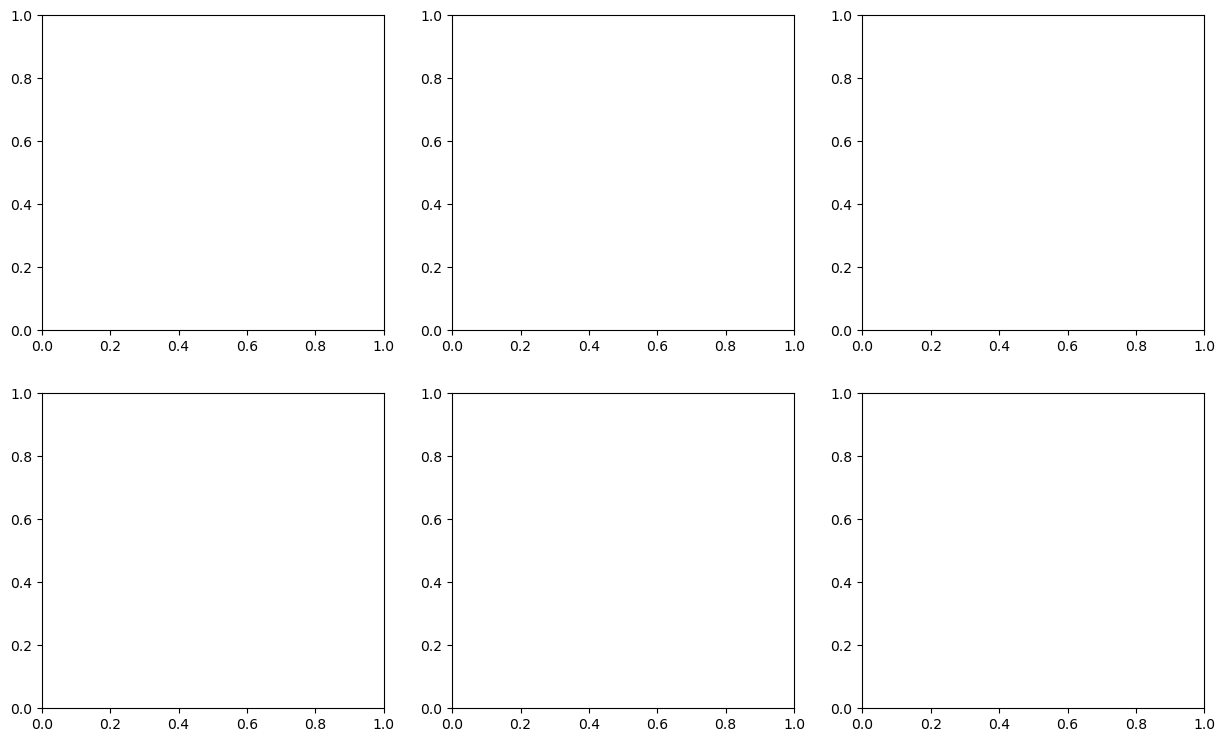

In [15]:
fig,axs = plt.subplots(2,3,figsize = (15,9))

In [16]:
def compare_cylinders():
    sizes = [81,243,441,729,945]
    fig,axs = plt.subplots(2,3,figsize = (15,9))
    for i, s in enumerate(sizes):
        simulation = Cylinder(size = 250, nPoints = s, volFrac = 0.01)
        simulation.place_shape(rMean = 5, hMean = 25, nonoverlapping=True)
        simulation.calculate_custom_FTI(three_d = False)
        simulation.reBin(s//3, for_sas=True)
        if s ==441:
            simulation.init_sas_model()
            simulation.optimize_scaling()
            
            ax = axs[1,2]
            im = ax.imshow(np.log10(simulation.I_sas), extent = [simulation.qx.min(), simulation.qx.max(), simulation.qx.min(), simulation.qx.max()])
            ax.set_xlabel(r"q $nm^{-1}$")
            ax.set_ylabel(r"q $nm^{-1}$")
            ax.set_title('SasModels simulation')
        ax = axs[i//3, i%3]
        binned_FTI = simulation.binned_slice['I'].values.reshape(simulation.nBins, simulation.nBins)
        im = ax.imshow(np.log10(binned_FTI), extent = [simulation.qx.min(), simulation.qx.max(), simulation.qx.min(), simulation.qx.max()])
        ax.set_xlabel(r"q $nm^{-1}$")
        ax.set_ylabel(r"q $nm^{-1}$")
        ax.set_title('{} points'.format(s))
    
   
    plt.title(r'$Scattering curves for a cylinder particle with radius 5 nm and length 25 nm in 250^3 nm simulated box$')

    plt.savefig('figures/cylinders_5nm_25_nm_comp.png', format = 'png')


FileNotFoundError: [Errno 2] No such file or directory: 'figures/cylinders_5nm_25_nm_comp.png'

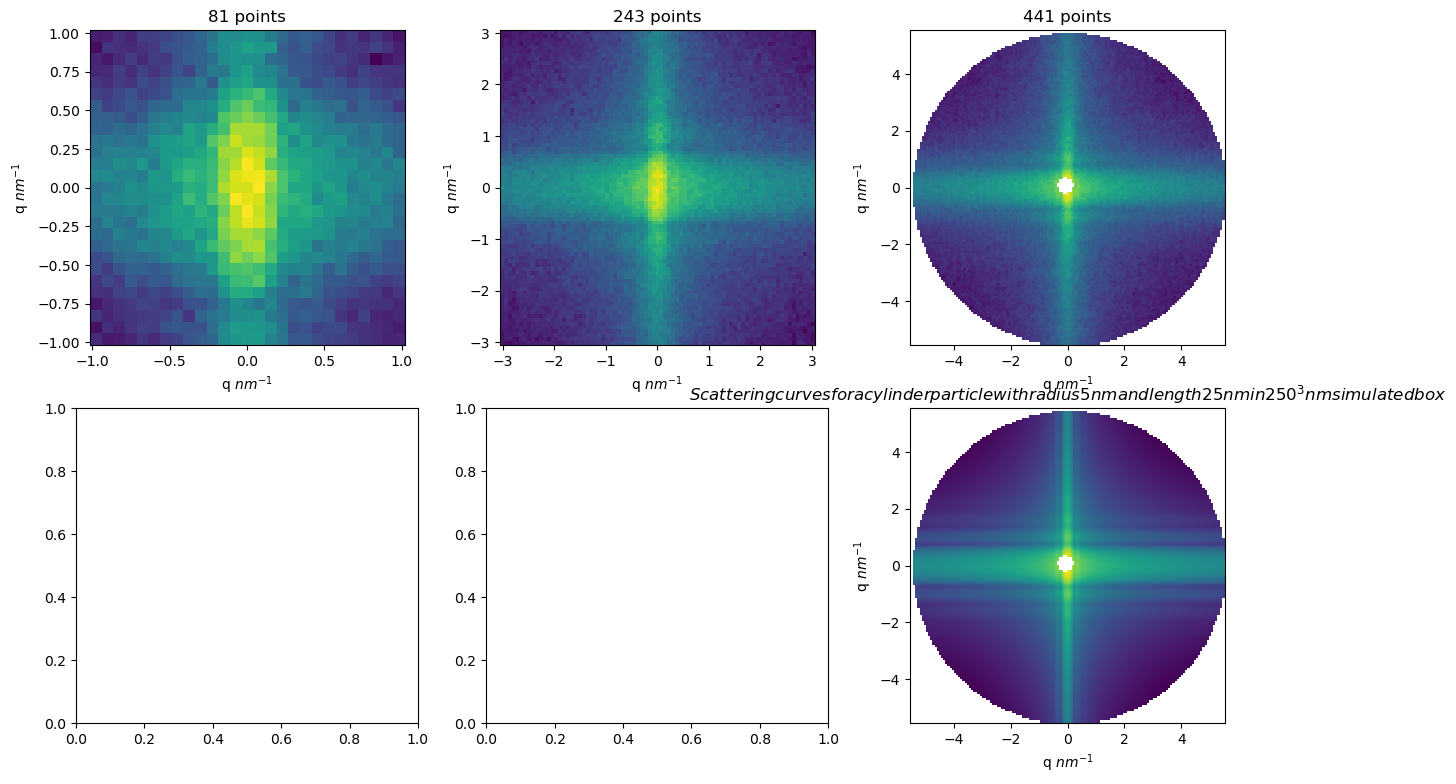

In [18]:
compare_cylinders()